In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))

pandas version is 0.24.2.
numpy version is 1.16.5.
scikit-learn version is 0.20.3.
seaborn version is 0.9.0.
matplotlib version is 2.2.4.


In [2]:
training_data = pd.read_csv("EH-training-data.csv", names = range(0, 59))
training_labels = pd.read_csv("EH-training-labels.csv", names = range(0, 3))
testing_data = pd.read_csv("EH-testing-data.csv", names = range(0, 59))
testing_labels = pd.read_csv("EH-testing-labels.csv", names = range(0, 3))
print("This set has {} training_data points and {} features.".format(*training_data.shape))
print("This set has {} training_label points and {} features.".format(*training_labels.shape))
print("This set has {} testing_data points and {} features.".format(*testing_data.shape))
print("This set has {} testing_label points and {} features.".format(*testing_labels.shape))
#display(training_data)
#display(training_labels)
#display(testing_data)
#display(testing_labels)

This set has 274654 training_data points and 59 features.
This set has 506688 training_label points and 3 features.
This set has 211810 testing_data points and 59 features.
This set has 439161 testing_label points and 3 features.


<h3>Basic Stats. Author claims he normalized dataset for privacy reasons.</h3>

In [3]:
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
count,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.00000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.00000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000
mean,137327.500000,1.483204,2.336685,350.393521,1721.975285,37.532925,1.111417,1.696425,1.456407,0.337213,3.403613,4.227577,5.937125,0.311159,0.002057,770.473224,43.103279,30.217517,12.825173,3.376328,4.760448,4.176895,3.783939,0.898305,3.478023,36.30139,0.320352,0.040141,0.068490,0.011819,0.039876,0.037618,0.01913,0.027220,0.071038,0.020965,0.201373,0.237117,0.400569,0.336729,0.449886,0.235008,0.177074,0.117431,0.059981,0.110455,0.084015,0.188652,0.036581,0.021522,0.045097,0.143479,3.060094,5.708379,6.360934,5.176888,5.072466,-91.037611,38.297782
std,79285.924754,0.499719,1.722036,842.266552,99.570376,10.626110,1.320764,0.791909,0.662386,0.887937,1.342585,1.168355,17.199464,0.462968,0.045309,975.292766,12.015969,9.295457,18.015589,1.529659,1.596023,1.722220,1.796954,0.302248,2.867129,6.32139,0.466613,0.196291,0.252585,0.108069,0.195667,0.190271,0.13698,0.162723,0.256890,0.143266,0.401027,0.425315,0.490015,0.472592,0.497483,0.424005,0.381732,0.321934,0.237452,0.313457,0.277411,0.391233,0.187730,0.145116,0.207517,0.350561,1.834048,1.136248,0.908374,1.302364,1.165751,28.034269,8.739515
min,1.000000,1.000000,-3.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-166.967500,-45.880000
25%,68664.250000,1.000000,3.000000,30.000000,1650.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,200.000000,34.000000,23.000000,0.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,6.000000,4.000000,4.000000,-111.922300,34.079900
50%,137327.500000,1.000000,3.000000,60.000000,1720.000000,35.000000,1.000000,2.000000,1.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.000000,457.000000,40.000000,28.000000,0.000000,4.000000,5.000000,4.000000,4.000000,1.000000,3.000000,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,7.000000,5.000000,5.000000,-87.621900,39.663600
75%,205990.750000,2.000000,3.000000,120.000000,1800.000000,44.000000,2.000000,2.000000,2.000000,0.000000,5.000000,5.000000,1.000000,1.000000,0.000000,957.000000,50.000000,35.000000,31.000000,4.000000,6.000000,5.000000,5.000000,1.000000,5.000000,41.00000,1.000

<h3>Checking for correlation between features. Might be useful for PCA. </h3>

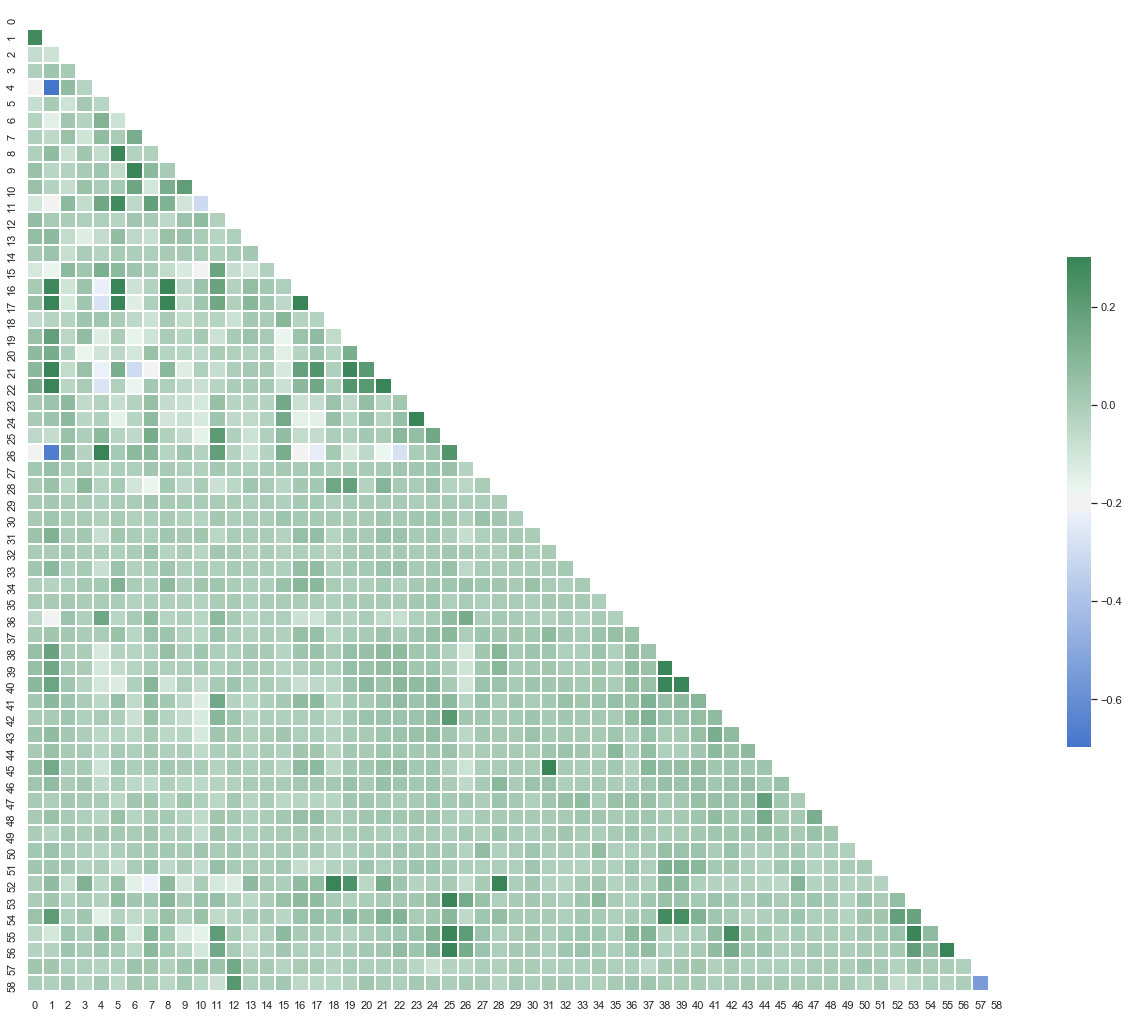

In [4]:
sns.set(style="white")
corr = training_data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (22, 18))
cmap = sns.diverging_palette(255, 140, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, 
            square = True, xticklabels = True, yticklabels = True, linewidths = 1, cbar_kws = {"shrink": .5}, ax = ax)

<h3>This is good to see the frequncies and to see differences in population or responses per feature.</h3>

In [5]:
def features_hist(data):
    """This method ouputs a histograms of features."""
    for i in data.columns:
        stuff = pd.DataFrame(data = data[i], columns = [i])
        stuff.plot(kind = 'hist', bins = 10)

In [6]:
#features_hist(training_data)

In [7]:
display(training_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1,2,3,1,1620,26,4,1,2,4,5,4,63,0,0,61,33,23,0,7,4,4,6,1,11,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,7,5,6,-117.9970,33.8005
1,2,2,3,200,1720,38,3,2,1,0,2,5,1,0,0,399,51,35,0,4,4,3,6,1,2,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,6,6,6,5,-73.8584,40.8424
2,3,2,3,120,1750,26,3,3,1,0,3,4,1,0,0,728,35,24,35,2,6,4,7,1,12,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,4,5,7,5,5,-98.4992,29.6647
3,4,1,3,200,1850,39,0,1,2,0,2,5,1,0,0,260,39,25,0,4,2,5,5,1,4,27,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,5,6,4,3,-72.4706,42.1729
4,5,1,3,200,1880,44,1,2,2,0,2,5,1,0,0,1456,46,30,0,2,7,2,2,1,7,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,7,6,4,5,-76.3964,42.9142
5,6,1,3,3000,1800,37,1,2,1,0,3,5,1,0,0,739,41,28,0,4,5,6,1,1,6,39,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,3,6,7,6,5,-115.2117,35.9897
6,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429
7,8,2,3,300,1620,63,0,2,2,0,5,4,1,1,0,774,73,59,0,3,4,4,2,1,3,32,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,2,7,6,5,5,-84.9237,32.5364
8,9,1,2,120,1770,62,0,2,2,0,3,3,1,0,0,0,68,47,0,4,5,5,3,0,0,36,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5,7,5,4,-85.2362,32.8691
9,10,2,3,120,1540,53,3,3,2,0,4,3,1,0,0,288,65,43,0,4,4,5,4,1,2,37,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,6,6,5,5,-82.5239,35.5452


In [8]:
display(training_labels)

,0,1,2
0,1,7,11883
1,1,7,257487
2,0,7,239226
3,0,7,82094
4,0,7,226461
5,0,7,232263
6,0,7,29109
7,0,7,50431
8,0,7,2
9,0,7,54462


<h2>Creating theTraining Dataset...again...</h2>

<h4>I had to reimport the dataset to do query manipulations. This is to prep for Machine Learning Algorithms.</h4>

In [9]:
import helper_functions as hf

In [10]:
training_data = hf.generate_array('EH-training-data.csv')
training_labels = hf.generate_array('EH-training-labels.csv')
testing_data = hf.generate_array('EH-testing-data.csv')
testing_label = hf.generate_array('EH-testing-labels.csv')
print("Training data: " + str(len(training_data)))
print("Training labels: " + str(len(training_labels)))
print("Testing data: " + str(len(testing_data)))
print("Testing labels: " + str(len(testing_labels)))

Training data: 274654
Training labels: 506688
Testing data: 211810
Testing labels: 439161


<h3>Testing out Queries</h3>

In [11]:
training_data = [hf.collapse(training_data[int(i[1]) - 1], training_data[int(i[2]) - 1]) for i in training_labels]

In [12]:
training_data

[[7.0,
  1.0,
  3.0,
  30.0,
  1900.0,
  39.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  5.0,
  1.0,
  0.0,
  0.0,
  171.0,
  35.0,
  27.0,
  0.0,
  4.0,
  4.0,
  4.0,
  4.0,
  1.0,
  1.0,
  34.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  3.0,
  4.0,
  4.0,
  5.0,
  -74.0008,
  40.7429,
  11883.0,
  2.0,
  3.0,
  3000.0,
  1600.0,
  38.0,
  1.0,
  1.0,
  2.0,
  0.0,
  2.0,
  4.0,
  1.0,
  0.0,
  0.0,
  276.0,
  43.0,
  35.0,
  45.0,
  4.0,
  4.0,
  3.0,
  3.0,
  1.0,
  4.0,
  45.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  7.0,
  6.0,
  7.0,
  6.0,
  -71.0581,
  42.4299],
 [7.0,
  1.0,
  3.0,
  30.0,
  1900.0,
  39.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  5.0,
  1.0,
  0.0,
  0.0,
  171.0,
  35.0,
 

In [13]:
output = []
for i in training_labels:
    output.append(int(i[0]))

In [14]:
output

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [15]:
X, y = np.asarray(training_data), np.asarray(output)

In [16]:
print(X.shape)
print(y.shape)

(506688L, 118L)
(506688L,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Tested on: %d, mislabelled points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
num_1 = (y_test != y_pred).sum()
num_2 = X_test.shape[0]
print("Error: %f" % (float(num_1)/num_2*100))

Tested on: 253344, mislabelled points: 32060
Error: 12.654730


In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
neighborhood_pred = neigh.predict(X_test)

In [20]:
print("Tested on: %d, mislabelled points: %d" % (X_test.shape[0], (y_test != neighborhood_pred).sum()))
num_1 = (y_test != neighborhood_pred).sum()
num_2 = X_test.shape[0]
print("Error: %f" % (float(num_1)/num_2*100))

Tested on: 253344, mislabelled points: 54424
Error: 21.482253
